# **ЗАДАНИЕ 1. ПЕРВИЧНЫЙ АНАЛИЗ ВРЕМЕННОГО РЯДА С ИСПОЛЬЗОВАНИЕМ ОПИСАТЕЛЬНЫХ СТАТИСТИК И ВИЗУАЛИЗАЦИИ**

Проведите первичный анализ данных по ценам на материал 1 с использованием описательных статистик и визуализации, выявите неоднородность данных с помощью коэффициентов дифференциации и коэффициента фондов.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.


In [ ]:
!pip install --upgrade xlrd # установка модуля для EXELевских файлов

     |████████████████████████████████| 96 kB 3.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import os
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Grouper
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Методика выполнения задания:**
# **Раздел 1. Загрузка данных и первичный анализ с использованием описательных статистик**


In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/наборы данных')

In [ ]:
data=pd.read_excel('AirQualityUCI.xlsx') # вывел данные из файла

In [ ]:
data.rename(columns={'CO(GT)':'CO'}, inplace=True) # упростил название колонки

**данные даны за 2 года, показания снимались каждый день каждый час, показаний много, будем группировать по дням**

In [ ]:
data.sample(5)

,Date,Time,CO,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
4284,2004-09-05,06:00:00,0.7,853.75,-200,2.211584,599.50,-200.0,1102.0,-200.0,1252.25,541.75,25.425,38.575000,1.235212
4634,2004-09-19,20:00:00,3.8,1272.50,-200,15.323862,1158.75,470.0,644.5,187.0,1704.25,1341.25,26.175,42.525001,1.423045
2362,2004-06-17,04:00:00,-200.0,804.00,-200,3.260158,668.00,32.0,1101.5,51.0,1478.50,753.00,18.775,58.650000,1.258064
3421,2004-07-31,07:00:00,1.0,948.25,-200,6.368789,828.75,68.0,800.5,71.0,1599.75,926.25,24.050,53.350000,1.574821
7039,2004-12-29,01:00:00,-200.0,969.75,-200,2.834044,641.50,-200.0,922.0,-200.0,1107.00,703.50,8.800,81.174999,0.921421


In [ ]:
data.shape

(9357, 15)

**Отсутствующие значения помечаются значением -200**

In [ ]:
data[data.CO == -200]['CO'].count() # пустых значений 1683 из 9357

1683

In [ ]:
data.groupby('Date')['CO'].mean().shape

(391,)

# **ИДЕМ ПУТЕМ ИНТЕРПОЛЯЦИИ**

In [ ]:
data_interpolate = data[['Date','CO']]
data_interpolate.tail(10)

,Date,CO
9347,2005-04-04,0.5
9348,2005-04-04,1.1
9349,2005-04-04,4.0
9350,2005-04-04,5.0
9351,2005-04-04,3.9
9352,2005-04-04,3.1
9353,2005-04-04,2.4
9354,2005-04-04,2.4
9355,2005-04-04,2.1
9356,2005-04-04,2.2


In [ ]:
data_interpolate['CO'] = np.where(data_interpolate['CO'] == -200, np.nan, data_interpolate['CO'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_interpolate.CO = data_interpolate.CO.interpolate()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
data_interpolate.sample(20)

Date
2005-02-02    3.35
2004-05-14    2.42
2004-09-15    2.99
2004-03-10    1.97
2004-10-17    3.16
2004-07-07    2.45
2005-01-05    3.02
2005-03-12    0.65
2005-02-01    2.87
2004-11-05    3.09
2004-11-23    4.88
2004-06-23    2.37
2004-03-31    1.93
2004-04-10    1.75
2004-10-29    2.48
2004-03-11    2.17
2004-05-17    1.63
2004-07-14    2.31
2005-01-26    0.42
2004-09-18    1.34
Name: CO, dtype: float64

In [ ]:
pd.set_option('precision', 2)

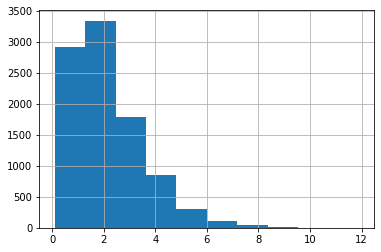

In [ ]:
data_interpolate.CO.hist()
plt.show()

In [ ]:
data_interpolate = data_interpolate.groupby('Date')['CO'].mean()

In [ ]:
type(df_day)

pandas.core.series.Series

In [ ]:
data_interpolate.shape

(391,)

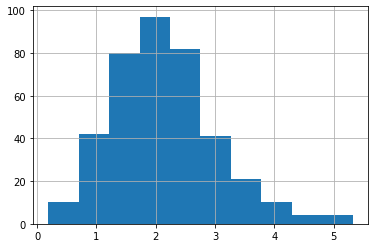

In [ ]:
data_interpolate.hist()
plt.show()

# **РЕЗУЛЬТАТ: после группировки по дням количество строк сохранилось(осталось  такое же как после интерполяции), распределение стало более нормальным**

**Отсутствующие значения помечаются значением -200**

# **ИДЕМ ПУТЕМ УДАЛЕНИЯ -200-Х СТРОК**

In [ ]:
df_del = data[['Date','CO']]
df_del.head(6)

,Date,CO
0,2004-03-10,2.6
1,2004-03-10,2.0
2,2004-03-10,2.2
3,2004-03-10,2.2
4,2004-03-10,1.6
5,2004-03-10,1.2


In [ ]:
df_del[df_del.CO == -200].count()

Date    1683
CO      1683
dtype: int64

УДАЛЯЕМ СТРОКИ С -200 И ГРУППИРУЕМ ПО ДАТЕ

In [ ]:
df_del['CO'] = np.where(df_del['CO'] == -200, np.nan, df_del['CO'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_del.isna().sum()

Date       0
CO      1683
dtype: int64

In [ ]:
df_del = df_del.dropna(how="any")

In [ ]:
data.shape

(9357, 15)

In [ ]:
df_del.shape

(7674, 2)

In [ ]:
df_del.CO.nunique()

96

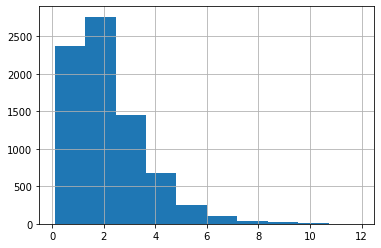

In [ ]:
df_del.CO.hist()

In [ ]:
i = df_del.groupby('Date')['CO'].mean().shape
i

(355,)

In [ ]:
391 - i[0] # 36 заначений из 391 мы теряем

36

In [ ]:
df_day = df_del.groupby('Date')['CO'].mean()

In [ ]:
df_day.shape

(355,)

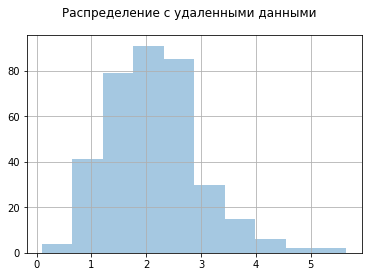

In [ ]:
df_day.hist(alpha = 0.4)
plt.suptitle("Распределение с удаленными данными")
plt.show()

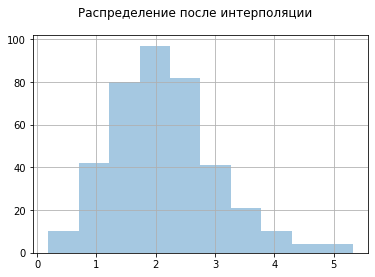

In [ ]:
data_interpolate.hist(alpha = 0.4)
plt.suptitle("Распределение после интерполяции")
plt.show()

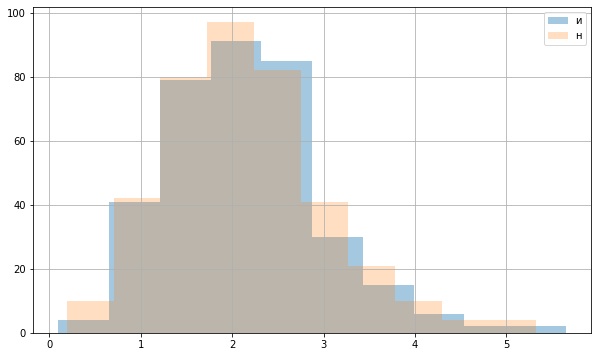

In [ ]:
plt.figure(figsize=(10, 6))
df_day.hist(alpha = 0.4)
plt.legend('удалили -200')
data_interpolate.hist(alpha = 0.25)
plt.legend('интерполировали -200')
plt.show()

# **оставляем данные c интерполяции**

In [ ]:
type(data_interpolate)

pandas.core.series.Series

In [ ]:
data_interpolate.dtypes

dtype('float64')

In [ ]:
df = data_interpolate.reset_index()
df.sample(4)

,Date,CO
87,2004-06-05,1.45
111,2004-06-29,2.33
37,2004-04-16,3.30
39,2004-04-18,1.60


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df = df.set_index('Date')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.loc['2005']

,CO
Date,
2005-01-01,2.11
2005-01-02,2.05
2005-01-03,2.51
2005-01-04,2.48
2005-01-05,3.02
...,...
2005-03-31,1.39
2005-04-01,1.08
2005-04-02,0.85


In [ ]:
pd.set_option('precision', 2)

In [ ]:
df.describe()

,CO
count,391.00
mean,2.13
std,0.87
min,0.19
25%,1.49
50%,2.08
75%,2.62
max,5.32


**14.	 Рассчитайте коэффициенты дифференциации:**

***Коэффициенты дифференциации*** – децильный (K_D), квартильный (K_Q) – показывают, во сколько раз нижняя граница 10% (25%) лучших превосходит верхнюю границу 10% (25%) худших значений измеряемого признака.

K_D=D_9/D_1

K_Q=Q_3/Q_1

Воспользуйтесь функцией quantile() для вычисления необходимых квантилей.


In [ ]:
d1=df.quantile(0.1) # нижний квантиль
d1

CO    1.05
Name: 0.1, dtype: float64

In [ ]:
d9=df.quantile(0.9) # верхний квантиль
d9

CO    3.18
Name: 0.9, dtype: float64

In [ ]:
kd=d9/d1 # коэффициент дифференциации
kd

CO    3.03
dtype: float64

In [ ]:
q1=df.quantile(0.25)
q1

CO    1.49
Name: 0.25, dtype: float64

In [ ]:
q3=df.quantile(0.75)
q3

CO    2.62
Name: 0.75, dtype: float64

In [ ]:
kd=q3/q1
kd

CO    1.76
dtype: float64

**15. Рассчитайте коэффициент фондов.**

***Коэффициент фондов (K_F)*** – показывает, во сколько раз среднее самых больших значений (x ̅_2, рассчитанное по 10% верхнего диапазона) больше среднего самых малых значений (x ̅_1, рассчитанное по 10% нижнего диапазона).

K_F=x ̅_2/x ̅_1


**КФ нужен для расчета соц. неравенства: дает знать во сколько раз средняя ЗП самых богатых больше ЗП самых бедных.**

In [ ]:
#Коэффициент фондов:
mu=df['CO'][df['CO']>=df['CO'].quantile(0.9)].mean()
mu # нашли среднее значение для 10% наибольших данных

3.871895801942609

In [ ]:
ml=df['CO'][df['CO']<=df['CO'].quantile(0.1)].mean()
ml # нашли среднее значение для 10% наименьших данных


0.7950930542671617

In [ ]:
kf=mu/ml # коэффициент фондов
kf

4.869739184819493

In [ ]:
pd.set_option('precision', 2)

In [ ]:
array=df.values

In [ ]:
X = df.values[:,0] # загоняем данные в список

In [ ]:
X.sort() # сортируем данные от меньшего к большему
X

array([0.18961039, 0.37662338, 0.3769697 , 0.42416667, 0.49038462,
       0.56363636, 0.6125    , 0.6375    , 0.65      , 0.6875    ,
       0.72916667, 0.74583333, 0.7547619 , 0.76472902, 0.77916667,
       0.79166667, 0.8       , 0.8       , 0.8       , 0.8       ,
       0.8       , 0.84583333, 0.85      , 0.85416667, 0.8625    ,
       0.8625    , 0.88541667, 0.9670068 , 0.97291667, 0.97916667,
       0.98333333, 0.9875    , 0.99583333, 1.        , 1.01666667,
       1.02083333, 1.025     , 1.025     , 1.04583333, 1.05      ,
       1.07317352, 1.075     , 1.08333333, 1.1       , 1.14140625,
       1.14166667, 1.175     , 1.17588235, 1.1792517 , 1.18125   ,
       1.1875    , 1.18958333, 1.225     , 1.24166667, 1.24166667,
       1.24742268, 1.25833333, 1.28125   , 1.28333333, 1.29166667,
       1.295     , 1.3       , 1.3       , 1.30416667, 1.30833333,
       1.31666667, 1.31666667, 1.31875   , 1.32083333, 1.33333333,
       1.33333333, 1.33333333, 1.33541667, 1.3375    , 1.34639

In [ ]:
first = int(len(X)*0.1) # расшифровка: нашли сколько значений составляют 10% данных
first

39

In [ ]:
lust = int(len(X)*0.9) # расшифровка: нашли сколько значений составляют 90% данных
lust

351

In [ ]:
first10 = X[0:first] # выводим 10% минимальных значений
first10

array([0.18961039, 0.37662338, 0.3769697 , 0.42416667, 0.49038462,
       0.56363636, 0.6125    , 0.6375    , 0.65      , 0.6875    ,
       0.72916667, 0.74583333, 0.7547619 , 0.76472902, 0.77916667,
       0.79166667, 0.8       , 0.8       , 0.8       , 0.8       ,
       0.8       , 0.84583333, 0.85      , 0.85416667, 0.8625    ,
       0.8625    , 0.88541667, 0.9670068 , 0.97291667, 0.97916667,
       0.98333333, 0.9875    , 0.99583333, 1.        , 1.01666667,
       1.02083333, 1.025     , 1.025     , 1.04583333])

In [ ]:
lust10 = X[lust:len(X)] # выводим 10% максимальных значений
lust10

array([3.18125   , 3.30416667, 3.35      , 3.36666667, 3.375     ,
       3.39166667, 3.40208333, 3.40847902, 3.4125    , 3.41666667,
       3.43615967, 3.43811189, 3.44375   , 3.48333333, 3.5375    ,
       3.54166667, 3.56041667, 3.64396552, 3.68257576, 3.68333333,
       3.74583333, 3.775     , 3.85416667, 3.89125874, 3.9125    ,
       3.91845238, 3.92083333, 3.96601562, 4.0625    , 4.12672414,
       4.1625    , 4.17708333, 4.29791667, 4.34440559, 4.50625   ,
       4.79755245, 4.88333333, 4.90268199, 5.2506993 , 5.32083333])

# **Раздел 2. Первичный анализ данных с использованием визуализации**

**15.	 Постройте линейный график, воспользовавшись функцией plot() и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

**16.	 Попробуйте изменить стиль графика, задав функцию plot(style='k.'), чтобы получить точечный график, и функцию plot(style='k--'), чтобы получить пунктирную линию.**

<Figure size 1296x360 with 0 Axes>

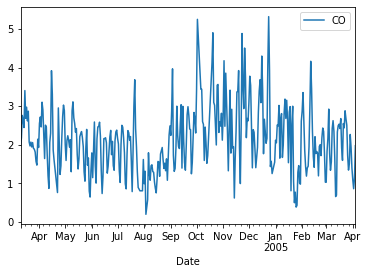

In [ ]:
df.plot()
plt.show()

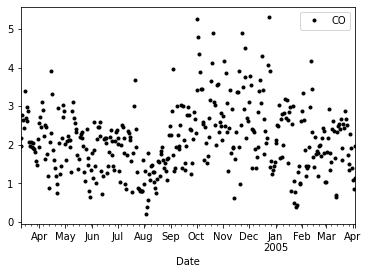

In [ ]:
df.plot(style='k.')
plt.show()

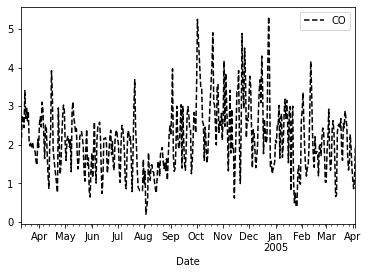

In [ ]:
df.plot(style='k--')
plt.show()

**17.	 Превратите объект DataFrame в переменной df в объект Series с помощью функции squeeze(). Результат запишите в переменную series.**

**18.	 Постройте сгруппированные по годам линейные графики. Это потребует выполнения следующих действий:**

**18.1.	Убедитесь в том, что Вы работаете с объектом Series, а не DataFrame. Превратить таблицу с одним столбцом целевых значений в объект Series можно с помощью функции squeeze()**

**18.2.	Импортируйте функции DataFrame и Grouper из модуля pandas.**

**18.3.	Сгруппируйте временной ряд по годам с помощью функции groupby(Grouper(freq='A')) и поместите результат в переменную groups.**

**18.4.	Создайте пустую таблицу данных с помощью функции DataFrame() и поместите результат в переменную years.**

**18.5.	С помощью команды for, перебирая период (name) и данные (group), содержащиеся в переменной groups, создайте в таблице данных years столбцы для каждого года (name.year), заполненные соответствующими данными о ценах на материал 1 (group.values).**

**18.6.	Постройте линейные графики друг под другом для всех годов, воспользовавшись функцией plot(subplots=True, legend=True) и функцией show() из модуля matplotlib.pyplot. Настроить график можно с помощью модуля matplotlib.**


In [ ]:
series=df.squeeze() # превращаем DataFrame в Series
# type(series)
series.sample(4)

Date
2004-09-02    2.87
2004-06-10    2.58
2004-12-12    2.84
2004-12-19    2.66
Name: CO, dtype: float64

**19.	 Постройте гистограмму для временного ряда, воспользовавшись функцией hist() и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

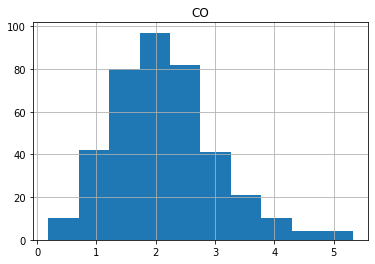

In [ ]:
df.hist()
plt.show()

**20.	 Постройте ядерную функцию плотности, воспользовавшись функцией plot(kind='kde') и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

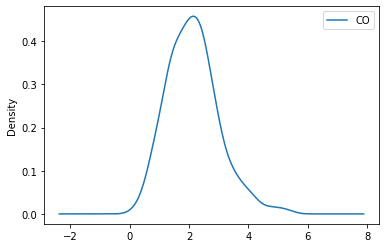

In [ ]:
df.plot(kind='kde')
plt.show()

**21.	 Постройте ящики с усами с разбивкой по годам, воспользовавшись функцией boxplot(), примененной к содержимому переменной years, и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

In [ ]:
df.shape

(391, 1)

In [ ]:
len(df[:97]),len(df[98:195]),len(df[196:293]),len(df[294:391])

(97, 97, 97, 97)

In [ ]:
i = pd.DataFrame({'lst1Title': list(df.CO[:97]),
                  'lst2Title': list(df.CO[98:195]),
                  'lst3Title': list(df.CO[196:293]),
                  'lst4Title': list(df.CO[294:391])})

In [ ]:
i

,lst1Title,lst2Title,lst3Title,lst4Title
0,1.97,2.16,2.76,1.35
1,2.17,2.18,2.40,1.45
2,2.76,2.05,2.39,1.54
3,2.64,1.26,1.24,2.11
4,2.44,1.44,1.53,2.05
...,...,...,...,...
92,2.58,2.11,4.06,1.39
93,2.22,1.53,5.32,1.08
94,1.32,1.34,3.91,0.85
95,0.73,1.97,1.43,1.14


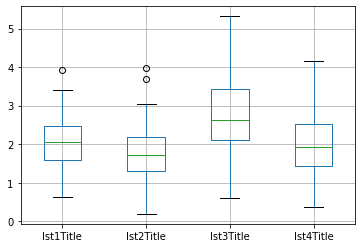

In [ ]:
i.boxplot()
plt.show()

**22.	 Постройте тепловую карту с разбивкой по годам, воспользовавшись функцией matshow(years.T, interpolation=None, aspect='auto') из модуля matplotlib.pyplot, примененной к транспонированному содержимому переменной years, и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

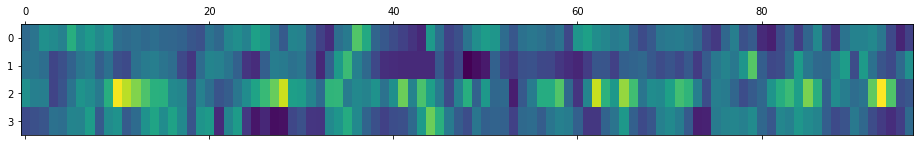

In [ ]:
plt.matshow(i.T, interpolation=None, aspect='auto')

plt.show()

# **ЗАДАНИЕ 2. ПРЕОБРАЗОВАНИЕ И АНАЛИЗ ДИНАМИКИ ВРЕМЕННОГО РЯДА**

Измените частоту представления данных по ценам на материал 1 в большую и в меньшую сторону, воспользуйтесь основными аналитическими характеристиками динамики для анализа и прогнозирования временного ряда.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.


**Методика выполнения задания:**

# **Раздел 1. Изменение частоты представления данных и интерполяция**




In [ ]:
df.shape

(391, 1)

**2.	Убедитесь в том, что Вы работаете с объектом Series, а не DataFrame. Превратить таблицу с одним столбцом целевых значений в объект Series можно с помощью функции squeeze().**

In [ ]:
series=df.squeeze() # переводим DataFrame в Series для дальнейшей работы
series.head(5)

Date
2004-03-10    1.97
2004-03-11    2.17
2004-03-12    2.76
2004-03-13    2.64
2004-03-14    2.44
Name: CO, dtype: float64

**3.	Перейдите к дневной разбивке данных, воспользовавшись функцией resample('D').mean(). Результат запишите в переменную upsampled. Выведите на экран первые 32 наблюдения, воспользовавшись функцией head(). Прокомментируйте результат.**

In [ ]:
upsampled=series.resample('D').mean() # переход от помесечной разбивки к разбивке по дням

In [ ]:
upsampled.head(32)

Date
2004-03-10    1.97
2004-03-11    2.17
2004-03-12    2.76
2004-03-13    2.64
2004-03-14    2.44
2004-03-15    3.40
2004-03-16    2.68
2004-03-17    2.97
2004-03-18    2.61
2004-03-19    2.87
2004-03-20    2.07
2004-03-21    1.96
2004-03-22    2.06
2004-03-23    1.94
2004-03-24    2.05
2004-03-25    1.90
2004-03-26    1.88
2004-03-27    1.81
2004-03-28    1.56
2004-03-29    1.47
2004-03-30    2.14
2004-03-31    1.93
2004-04-01    2.55
2004-04-02    2.72
2004-04-03    2.46
2004-04-04    3.10
2004-04-05    2.90
2004-04-06    2.23
2004-04-07    1.64
2004-04-08    2.50
2004-04-09    2.45
2004-04-10    1.75
Freq: D, Name: CO, dtype: float64

In [ ]:
upsampled.shape

(391,)

**4.	Проведите интерполяцию данных на основе полинома 1-ой степени, воспользовавшись функцией interpolate(method='linear'). Результат запишите в переменную interpolated. Выведите на экран первые 32 наблюдения, воспользовавшись функцией head(). Каким будет значение цены 7 января 2007 года?**

**Интерполя́ция** (от лат. inter–polis — «разглаженный, подновлённый, обновлённый; преобразованный») — в вычислительной математике нахождение неизвестных промежуточных значений некоторой функции, по имеющемуся дискретному набору её известных значений, определенным способом.

**полином_1(первого)_порядка**

In [ ]:
interpolated=upsampled.interpolate(method='linear') # в качестве метода интерполяции используем линейную регрессию

In [ ]:
interpolated.head(32)

Date
2004-03-10    1.97
2004-03-11    2.17
2004-03-12    2.76
2004-03-13    2.64
2004-03-14    2.44
2004-03-15    3.40
2004-03-16    2.68
2004-03-17    2.97
2004-03-18    2.61
2004-03-19    2.87
2004-03-20    2.07
2004-03-21    1.96
2004-03-22    2.06
2004-03-23    1.94
2004-03-24    2.05
2004-03-25    1.90
2004-03-26    1.88
2004-03-27    1.81
2004-03-28    1.56
2004-03-29    1.47
2004-03-30    2.14
2004-03-31    1.93
2004-04-01    2.55
2004-04-02    2.72
2004-04-03    2.46
2004-04-04    3.10
2004-04-05    2.90
2004-04-06    2.23
2004-04-07    1.64
2004-04-08    2.50
2004-04-09    2.45
2004-04-10    1.75
Freq: D, Name: CO, dtype: float64

**5.	Постройте для интерполированного ряда линейный график, воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

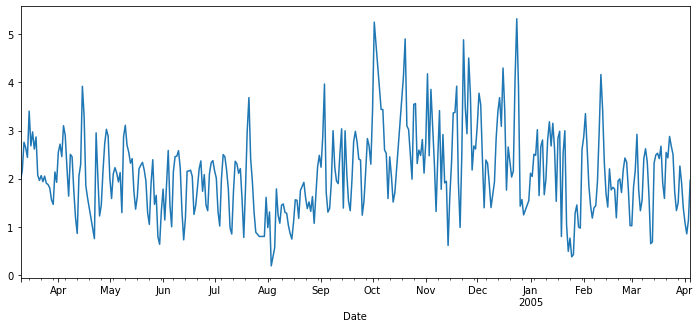

In [ ]:
plt.figure(figsize=(12, 5))
interpolated.plot()
plt.show()

**6.	Проведите интерполяцию данных на основе полинома 2-ой степени, воспользовавшись функцией interpolate(method='spline', order=2). Результат запишите в переменную interpolated. Выведите на экран первые 32 наблюдения, воспользовавшись функцией head(). Каким будет значение цены 7 января 2007 года?**

**полином_2(второго)_порядка**

In [ ]:
interpolated=upsampled.interpolate(method='spline', order=2)

In [ ]:
interpolated.head(32)

Date
2004-03-10    1.97
2004-03-11    2.17
2004-03-12    2.76
2004-03-13    2.64
2004-03-14    2.44
2004-03-15    3.40
2004-03-16    2.68
2004-03-17    2.97
2004-03-18    2.61
2004-03-19    2.87
2004-03-20    2.07
2004-03-21    1.96
2004-03-22    2.06
2004-03-23    1.94
2004-03-24    2.05
2004-03-25    1.90
2004-03-26    1.88
2004-03-27    1.81
2004-03-28    1.56
2004-03-29    1.47
2004-03-30    2.14
2004-03-31    1.93
2004-04-01    2.55
2004-04-02    2.72
2004-04-03    2.46
2004-04-04    3.10
2004-04-05    2.90
2004-04-06    2.23
2004-04-07    1.64
2004-04-08    2.50
2004-04-09    2.45
2004-04-10    1.75
Freq: D, Name: CO, dtype: float64

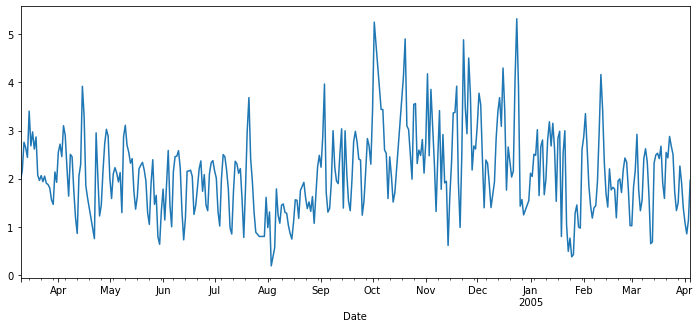

In [ ]:
plt.figure(figsize=(12, 5))
interpolated.plot()
plt.show()

**8.	Перейдите к квартальной разбивке данных для 2007 года, воспользовавшись функцией resample('Q'). Результат запишите в переменную resample. Для каждого квартала найдите среднеквартальное значение цены на материал 1, воспользовавшись функцией mean(). Результат запишите в переменную q_mean. Выведите на экран первые 5 наблюдений, воспользовавшись функцией head(). Прокомментируйте результат.**

**Месячная разбивка:**

In [ ]:
q_mean=series.resample('M').mean() # переходим к таблице по кварталам

In [ ]:
q_mean.head(10)

Date
2004-03-31    2.24
2004-04-30    2.14
2004-05-31    1.92
2004-06-30    1.86
2004-07-31    1.71
2004-08-31    1.34
2004-09-30    2.25
2004-10-31    3.02
2004-11-30    2.74
2004-12-31    2.56
Freq: M, Name: CO, dtype: float64

**9.	Постройте для преобразованного ряда линейный график, воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot. Что вы можете сказать о наблюдаемой тенденции?**

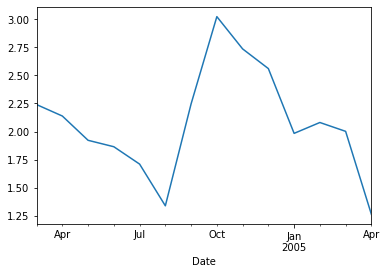

In [ ]:
q_mean.plot()
plt.show()

**10. Перейдите к годовой разбивке данных, воспользовавшись функцией resample('A'). Результат запишите в переменную resample. Для каждого года найдите среднегодовое значение цены на материал 1, воспользовавшись функцией mean(). Результат запишите в переменную y_mean. Выведите на экран первые 5 наблюдений, воспользовавшись функцией head().**

In [ ]:
y_mean=series.resample('Q').mean()

In [ ]:
y_mean

Date
2004-03-31    2.24
2004-06-30    1.97
2004-09-30    1.76
2004-12-31    2.77
2005-03-31    2.02
2005-06-30    1.26
Freq: Q-DEC, Name: CO, dtype: float64

**11. Постройте для преобразованного ряда линейный график, воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot.**

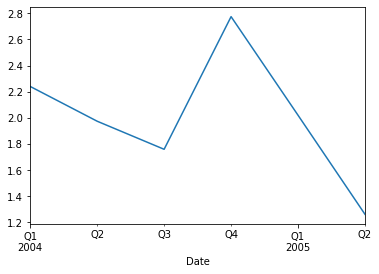

In [ ]:
y_mean.plot()
plt.show()


# **Раздел 2. Анализ динамики и прогнозирование временного ряда**

**12.	 Постройте таблицу данных на основе значений среднегодовой цены на материал 1 (y_mean.values), воспользовавшись функцией DataFrame() из модуля pandas, результат запишите в переменную values.**

In [ ]:
y_mean=series.resample('Q').mean() # выводим значения по годам
y_mean

Date
2004-03-31    2.24
2004-06-30    1.97
2004-09-30    1.76
2004-12-31    2.77
2005-03-31    2.02
2005-06-30    1.26
Freq: Q-DEC, Name: CO, dtype: float64

In [ ]:
values=pd.DataFrame(y_mean.values)
values

,0
0,2.24
1,1.97
2,1.76
3,2.77
4,2.02
5,1.26


**13.	Поместите в переменную df исходный ряд и сдвинутый на 1 шаг, воспользовавшись функцией concat([values.shift(1), values], axis=1) из модуля pandas. Дайте полученным столбцам названия 't' и 't+1', воспользовавшись следующей командой: df.columns = ['t', 't+1']. Выведите на экран первые 5 значений, воспользовавшись функцией head().**

In [ ]:
df=pd.concat([values.shift(1), values], axis=1) # создаем столбец со смещением на единицу

In [ ]:
df.columns = ['t-1', 't']

In [ ]:
df

,t-1,t
0,NaN,2.24
1,2.24,1.97
2,1.97,1.76
3,1.76,2.77
4,2.77,2.02
5,2.02,1.26


**14.	 Рассчитайте на основе полученной таблицы среднегодовых значений цены на материал 1основные показатели динамики за 4 года. Необходимые при этом формулы приведены в таблице ниже.**

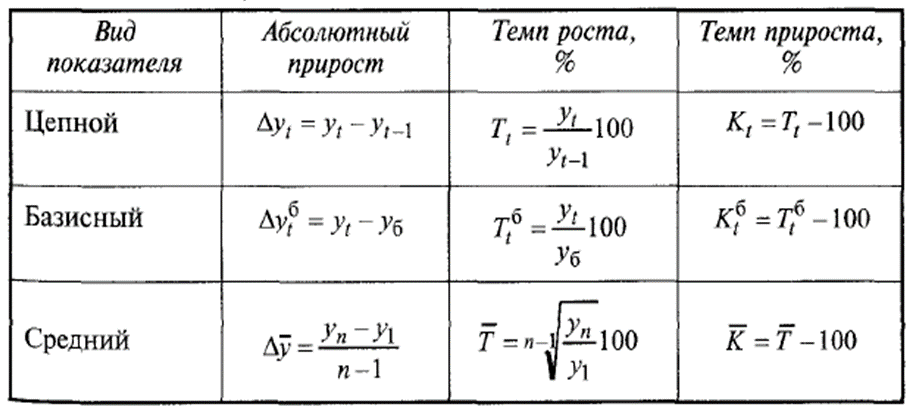

**Абсолютный прирост** - от последующего значения отнимаем предыдущее и получаем прирост, если получаем отрицательное значение, то убыль.

**Темп роста** - если Темп роста = 100%, то рост неизменим.
                 Средний темп роста показывает сколько в среднем процентов последующий уровень составляет от предыдущего.

**Темп прироста** - показывает на сколько изменился последующий уровень по-сравнению с базой или предыдущим уровнем

**Цепной** - каждый последующий уровень сравнивается с предыдущим

**Базисный** - все расчеты происходят от одной базы (одного значения)

**Средий** -
из последнего значения вычесть первое и разделить на n-1, где n - количество элементов ряда

**14.1.	Поместите в таблицу данных df столбцы с вычисленными значениями следующих показателей:**

1)	абсолютный цепной прирост (Delta_t),

2)	абсолютный базисный прирост (Delta_0),

3)	цепной темп роста (Temp_t),

4)	базисный темп роста (Temp_0),

5)	цепной темп прироста (TDelta_t),

6)	базисный темп прироста (TDelta_0).

В качестве базисного периода возьмите 2007 год. Выведите на экран полученный результат.


In [ ]:
df.head()

,t-1,t
0,NaN,2.24
1,2.24,1.97
2,1.97,1.76
3,1.76,2.77
4,2.77,2.02


In [ ]:
df['t'][0] # это база для абсолютного базисного прироста

2.2401515151515152

In [ ]:
df['Delta_t']=df['t']-df['t-1'] # абсолютный цепной прирост (Delta_t)

In [ ]:
df['Delta_0']=df['t']-df['t'][0] # абсолютный базисный прирост (Delta_0),

In [ ]:
df['Temp_t']=df['t']/df['t-1'] # цепной темп роста (Temp_t)

In [ ]:
df['Temp_0']=df['t']/df['t'][0] # базисный темп роста (Temp_0)

In [ ]:
df['TDelta_t'] = df['Temp_t'] - 1 # цепной темп прироста (TDelta_t)

In [ ]:
df['TDelta_0'] = df['Temp_0'] - 1 # базисный темп прироста (TDelta_0)
df.head()

,t-1,t,Delta_t,Delta_0,Temp_t,Temp_0,TDelta_t,TDelta_0
0,NaN,2.24,NaN,0.00,NaN,1.00,NaN,0.00
1,2.24,1.97,-0.27,-0.27,0.88,0.88,-0.12,-0.12
2,1.97,1.76,-0.21,-0.48,0.89,0.79,-0.11,-0.21
3,1.76,2.77,1.01,0.53,1.58,1.24,0.58,0.24
4,2.77,2.02,-0.75,-0.22,0.73,0.90,-0.27,-0.10


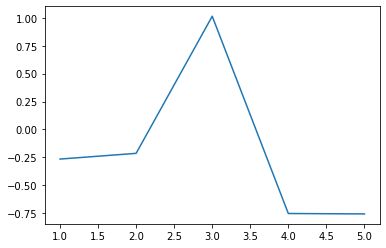

In [ ]:
df['Delta_t'].plot()
plt.show()

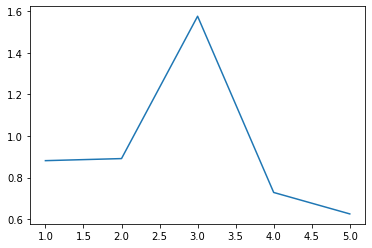

In [ ]:
df['Temp_t'].plot()
plt.show()

**14.2.	Рассчитайте за 4 года средний абсолютный прирост (AvgDelta), средний темп роста (AvgTemp), средний темп прироста (AvgTDelta). Для нахождения первого и последнего значения временного ряда воспользуйтесь методом iloc[]. Прокомментируйте результат.**

In [ ]:
df

,t-1,t,Delta_t,Delta_0,Temp_t,Temp_0,TDelta_t,TDelta_0
0,NaN,2.24,NaN,0.00,NaN,1.00,NaN,0.00
1,2.24,1.97,-0.27,-0.27,0.88,0.88,-0.12,-0.12
2,1.97,1.76,-0.21,-0.48,0.89,0.79,-0.11,-0.21
3,1.76,2.77,1.01,0.53,1.58,1.24,0.58,0.24
4,2.77,2.02,-0.75,-0.22,0.73,0.90,-0.27,-0.10
5,2.02,1.26,-0.76,-0.98,0.62,0.56,-0.38,-0.44


In [ ]:
i_1 = df.iloc[0,1]
i_n = df.iloc[-1,1]
i_1,i_n

(2.2401515151515152, 1.2622916666666666)

In [ ]:
AvgDelta = (i_n - i_1)/(len(df.t)-1) # средний абсолютный прирост
AvgDelta

-0.19557196969696972

In [ ]:
AvgTemp = ((i_n/i_1)**(1/(len(df.t)-1))) # средний темп роста
AvgTemp

0.8916131485451652

In [ ]:
AvgTDelta = AvgTemp - 1 # средний темп прироста
AvgTDelta

-0.10838685145483484

# **ПРОГНОЗ на последующий квартал (6-й квартал):**

In [ ]:
predict=i_n+AvgDelta # прогноз на январь 2011 года
predict

1.0667196969696968

# **ПРОГНОЗ на 7-й квартал:**


In [ ]:
predict=i_n+2*AvgDelta
predict

0.8711477272727272

# **ЗАДАНИЕ 3. СГЛАЖИВАНИЕ ВРЕМЕННОГО РЯДА**
На основе методов простой и взвешенной скользящих средних для цен на материал 1 выявите тренд и дайте прогноз на год вперед.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from pandas import DataFrame
from pandas import concat

Методика выполнения задания:

# **Раздел 1. Простая скользящая средняя с фиксированным окном**


In [ ]:
df = data_interpolate.reset_index()
df.sample(4)

,Date,CO
369,2005-03-14,2.33
310,2005-01-14,3.15
341,2005-02-14,1.69
232,2004-10-28,2.59


In [ ]:
df = df.set_index('Date')

In [ ]:
df.head(5)

,CO
Date,
2004-03-10,1.97
2004-03-11,2.17
2004-03-12,2.76
2004-03-13,2.64
2004-03-14,2.44


**3.	Преобразуйте набор данных о цене на материал 1 с помощью простой скользящей средней с размером окна 3 месяца. Воспользуйтесь набором функций rolling(window=3).mean(). Результат запишите в переменную rolling_mean.** **В данном случае преобразованное значение в момент времени (t) вычисляется, как среднее значение для предыдущих 3 наблюдений** (t-2, t-1, t): obs(t) =1/3*(obs(t - 2) + obs(t - 1) + obs(t)).

In [ ]:
series=df.squeeze() # переводим DataFrame в Series для дальнейшей работы
series.head(5)

Date
2004-03-10    1.97
2004-03-11    2.17
2004-03-12    2.76
2004-03-13    2.64
2004-03-14    2.44
Name: CO, dtype: float64

In [ ]:
# сглаживание нужно для поиска тренда

In [ ]:
rolling_mean=series.rolling(window=3).mean()
# расшфровка: из 3-х(окно) значений делает 1(берет среднее от 3-х) и записывает вместо 3-го,
# смещается на 1 строку вниз, опять берет 3 значения ...., так выравнивается ряд

In [ ]:
rolling_mean.head(10)

Date
2004-03-10     NaN
2004-03-11     NaN
2004-03-12    2.30
2004-03-13    2.52
2004-03-14    2.61
2004-03-15    2.83
2004-03-16    2.84
2004-03-17    3.02
2004-03-18    2.76
2004-03-19    2.82
Name: CO, dtype: float64

**4.	Поместите на одну диаграмму линейный график исходных данных (series) и преобразованных данных (rolling_mean), воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot. График скользящей средней изобразите красным цветом, для этого в функции plot() задайте параметр color='red'. Прокомментируйте результат.**

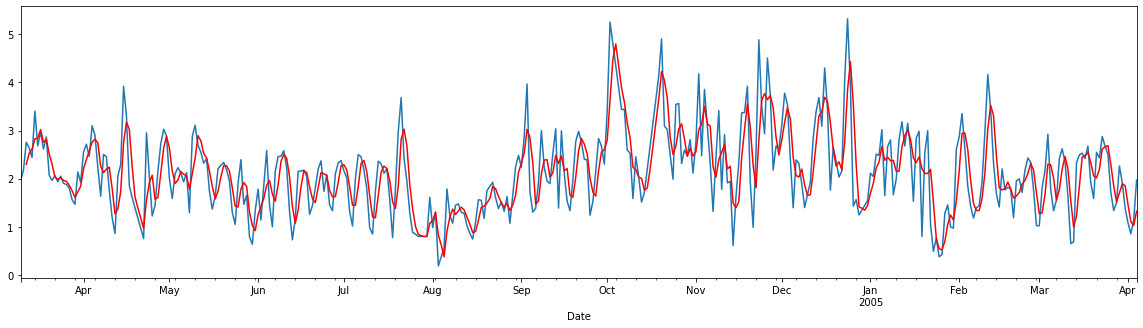

In [ ]:
plt.figure(figsize=(20, 5))
series.plot()
rolling_mean.plot(color='red')
plt.show()

**5.	Проделайте то же самое для ширины окна 5 месяцев. Сравните результаты. Какую ширину окна Вы выберете?**

In [ ]:
rolling_mean=series.rolling(window=5).mean()

In [ ]:
rolling_mean.head(10)

Date
2004-03-10     NaN
2004-03-11     NaN
2004-03-12     NaN
2004-03-13     NaN
2004-03-14    2.40
2004-03-15    2.68
2004-03-16    2.78
2004-03-17    2.83
2004-03-18    2.82
2004-03-19    2.91
Name: CO, dtype: float64

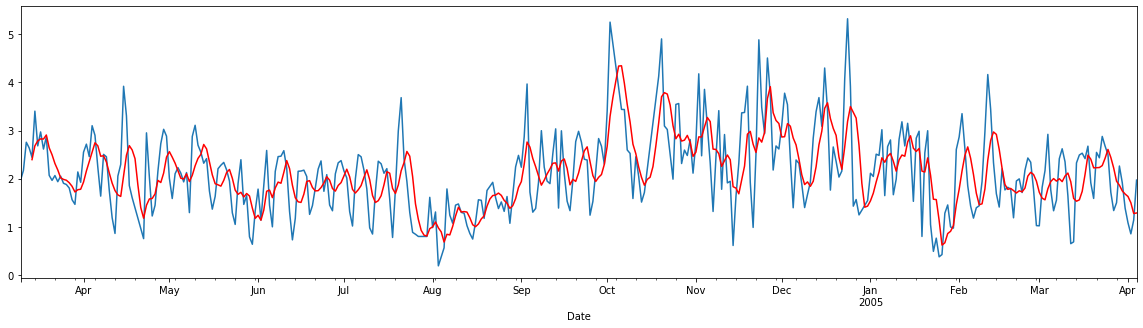

In [ ]:
plt.figure(figsize=(20, 5))
series.plot()
rolling_mean.plot(color='red')
plt.show()

**6.	Воспользуйтесь моделью простой скользящей средней с выбранной Вами шириной окна для прогнозирования значений временного ряда в пошаговом режиме. При этом прогнозируемое и ожидаемое значение печатается на каждом временном шаге. Это потребует выполнения следующих действий:**

**6.1.	Запишите в переменную X значения временного ряда, обратившись к атрибуту values.**

In [ ]:
X=series.values

**6.2.	В переменной window задайте выбранную Вами ширину окна.**

In [ ]:
window =3

**6.3.	В переменную history поместите список значений временного ряда в пределах ширины окна, создав его методом спискового включения [X[i] for i in range(window)].**

In [ ]:
history =[X[i] for i in range(window)]
history

[1.9666666666666668, 2.1729166666666666, 2.75625]

**6.4.	В переменную test поместите список значений временного ряда в интервале от окончания ширины окна до длины временного ряда, создав его методом спискового включения [X[i] for i in range(window, len(X))].**

In [ ]:
test =[X[i] for i in range(window, len(X))]
test

**6.5.	Создайте пустой список с помощью функции list() и запишите его в переменную predictions.**

In [ ]:
predictions=list()

**6.6.	Перебирайте временные периоды t тестового набора range(len(test)) с помощью цикла for и для каждого наблюдения выполняйте следующие действия:**

**6.6.1.	С помощью функции len() определите длину исторических данных (history) и результат запишите в переменную length.**

**6.6.2.	Создайте список значений временного ряда для расчета скользящей средней с помощью метода спискового включения [history[i] for i in range(length-window,length)]. Найдите среднее значение списка с помощью функции mean(). Результат запишите в переменную yhat.**

**6.6.3.	Наблюдаемое на данном шаге значение test[t] запишите в переменную obs.**

**6.6.4.	В список predictions добавьте найденный прогноз с помощью функции append(yhat).**

**6.6.5.	В список history добавьте новое наблюдаемое значение с помощью функции append(obs).**

**6.6.6.	Выведите на экран прогнозное и наблюдаемое на каждом шаге значение временного ряда с помощью функции print('predicted=%f, expected=%f' % (yhat, obs)).**


In [ ]:
# делаем прогноз пошагово, т.е. по 3-ем делаем прогноз (см. в predicted), а фактическое значение см. в expected,
# затем смещаемся и опять ....
for t in range(len(test)):
  length=len(history)
  yhat=np.mean([history[i] for i in range(length-window,length)])
  obs=test[t]
  predictions.append(yhat)
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

predicted=2.298611, expected=2.639583
predicted=2.522917, expected=2.441667
predicted=2.612500, expected=3.402083
predicted=2.827778, expected=2.681250
predicted=2.841667, expected=2.970833
predicted=3.018056, expected=2.614583
predicted=2.755556, expected=2.866667
predicted=2.817361, expected=2.068750
predicted=2.516667, expected=1.964583
predicted=2.300000, expected=2.064583
predicted=2.032639, expected=1.937500
predicted=1.988889, expected=2.052083
predicted=2.018056, expected=1.904167
predicted=1.964583, expected=1.879167
predicted=1.945139, expected=1.806250
predicted=1.863194, expected=1.562500
predicted=1.749306, expected=1.466667
predicted=1.611806, expected=2.139583
predicted=1.722917, expected=1.925000
predicted=1.843750, expected=2.550000
predicted=2.204861, expected=2.716667
predicted=2.397222, expected=2.458333
predicted=2.575000, expected=3.100000
predicted=2.758333, expected=2.900000
predicted=2.819444, expected=2.233333
predicted=2.744444, expected=1.637500
predicted=2.

**7.	Рассчитайте и выведите на экран корень квадратный из среднеквадратичной ошибки (RMSE) для всех сделанных прогнозов, воспользовавшись функцией sqrt() из модуля math для извлечения корня квадратного и функцией mean_squared_error(test, predictions) из модуля sklearn.metrics для нахождения средней квадратичной ошибки. Прокомментируйте результат.**

In [ ]:
RMSE=sqrt(mean_squared_error(test, predictions)) # значение слишком велико
RMSE

0.8285441457051559

In [ ]:
R2=r2_score(test, predictions) # очень плохой результат
R2

0.10460503629933848

**8.	Поместите на одну диаграмму линейный график исходных данных (test) и спрогнозированных данных (predictions), воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot. Прогнозный график изобразите красным цветом, задав в функции plot() параметр color='red'. Прокомментируйте результат.**

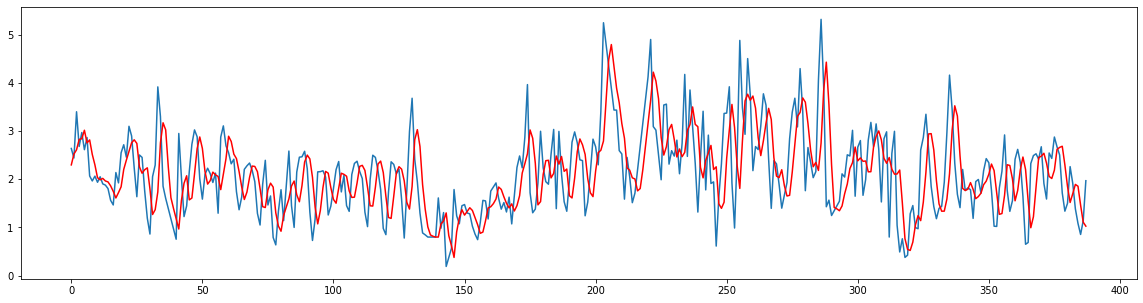

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(test) # фактические значения
plt.plot(predictions, color='red') # прогнозные значения, которые определялись на
                                   # каждом шаге сучетом поступающей информации
plt.show()

# **Раздел 2. Простая скользящая средняя с расширяющимся окном**

**9.	Найдите простую среднюю для расширяющегося окна, воспользовавшись сочетанием функций expanding().mean(). Результат запишите в переменную exp_mean. Выведите на экран первые 10 наблюдений, воспользовавшись функцией head(). Прокомментируйте результат.**


In [ ]:
exp_mean=series.expanding().mean()

In [ ]:
exp_mean.head(10)

Date
2004-03-10    1.97
2004-03-11    2.07
2004-03-12    2.30
2004-03-13    2.38
2004-03-14    2.40
2004-03-15    2.56
2004-03-16    2.58
2004-03-17    2.63
2004-03-18    2.63
2004-03-19    2.65
Name: CO, dtype: float64

**10.	Поместите на одну диаграмму линейный график исходных данных (series) и преобразованных данных (expanding_mean), воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot. График преобразованных данных изобразите красным цветом, задав в функции plot() параметр color='red'. Прокомментируйте результат.**

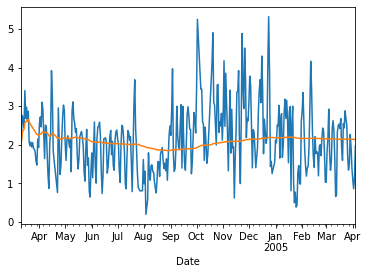

In [ ]:
series.plot()
exp_mean.plot()
plt.show()

# **Раздел 3. Взвешенная скользящая средняя с фиксированным окном**

**11.	 Задайте веса в линейно возрастающем порядке. Пусть ширина окна равна 5. Сначала сгенерируйте 5 целых чисел от 1 до 6 не включительно с помощью функции arange() из модуля numpy. Результат запишите в переменную fig. Нормируйте полученные числа путем их деления на сумму списка, найденную с помощью функции sum(). Запишите полученный результат в переменную weights и выведите ее содержимое на экран.**


# **!!!!!!!!!!! создаем_свои_веса**

In [ ]:
fig=np.arange(1,6)
fig

array([1, 2, 3, 4, 5])

In [ ]:
# пояснеие: эти веса не самрегулируются, а задаются мной

In [ ]:
weights = fig/fig.sum() # здесь получаем чтобы веса в сумме давали единицу
weights

array([0.06666667, 0.13333333, 0.2       , 0.26666667, 0.33333333])

In [ ]:
# пояснение: количество весов weights и ширина окна rolling(5) д.б. равны, т.к. первый вес умножается на первое
# значение окна потом прибавляется второй вес умноженный на второе значение окна и т.д., итоговая сумма будет
# нашим значением

**12.	 Далее вычислите взвешенную скользящую среднюю, воспользовавшись функцией rolling(5), чтобы задать скользящее окно, и написанной вами lambda функцией для вычисления средней взвешенной, применить которую к данным можно с помощью функции  apply(lambda series: np.dot(series,weights, raw=True). Последние наблюдения имеют большие веса, чем первые, в соответствии с заданным правилом. Результат запишите в переменную wma51. Выведите на экран первые 10 наблюдений, воспользовавшись функцией head(). Прокомментируйте результат.**

In [ ]:
# здесь получаем ряд выравнивания с использованием весов(заданных)
wma51=series.rolling(5).apply(lambda x: np.dot(x,weights), raw=True)
wma51.head(10)

Date
2004-03-10     NaN
2004-03-11     NaN
2004-03-12     NaN
2004-03-13     NaN
2004-03-14    2.49
2004-03-15    2.83
2004-03-16    2.83
2004-03-17    2.89
2004-03-18    2.82
2004-03-19    2.83
Name: CO, dtype: float64

**13.	 Найдите простую скользящую среднюю для такой же ширины окна, воспользовавшись сочетанием функций rolling(5).mean(). Результат запишите в переменную sma5.**

In [ ]:
sma5=series.rolling(5).mean() # простая скользящая средняя без весов
sma5

Date
2004-03-10     NaN
2004-03-11     NaN
2004-03-12     NaN
2004-03-13     NaN
2004-03-14    2.40
              ... 
2005-03-31    1.68
2005-04-01    1.63
2005-04-02    1.50
2005-04-03    1.28
2005-04-04    1.29
Name: CO, Length: 391, dtype: float64

**14.	Поместите на одну диаграмму линейный график исходных данных (series) и преобразованных на основе простой (sma5) и взвешенной скользящей средней (wma51) для ширины окна 5, воспользовавшись функцией figure(figsize = (12,6)), plot(data, label=label), а также функцией show() из модуля matplotlib.pyplot. Подпишите оси с помощью функций xlabel("Date") и ylabel("Price") из модуля matplotlib.pyplot. Создайте легенду с помощью функции legend() из модуля matplotlib.pyplot. Прокомментируйте результат.**

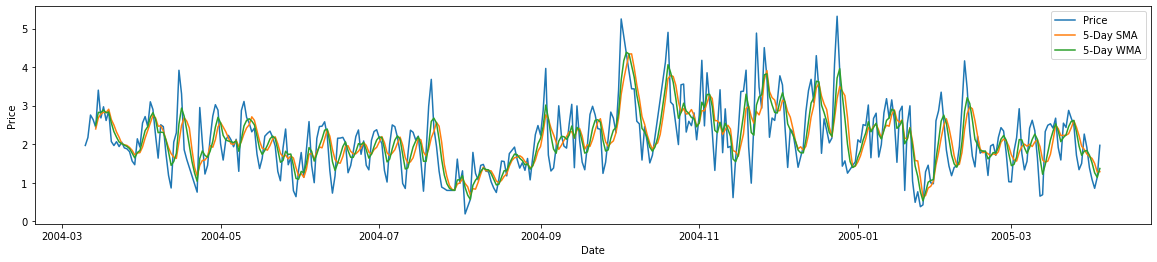

In [ ]:
plt.figure(figsize = (20,4))

plt.plot(series, label='Price')
plt.plot(sma5, label='5-Day SMA')
plt.plot(wma51, label='5-Day WMA')

plt.xlabel("Date")
plt.ylabel("Price")

plt.legend()
plt.show()

**15.	 Измените веса в формуле взвешенной скользящей средней. Воспользуйтесь весами для сглаживания по полиномам 2-го или 3-го порядка для ширины окна, равной 5: [-3/35,12/35,17/35,12/35,-3/35] . Создайте список весов с помощью функции array из модуля numpy. Результат запишите в переменную weights.**

Если мы берем **полиномы 2-го или 3-го** порядка, то существует **таблица** для задания ширины окна.

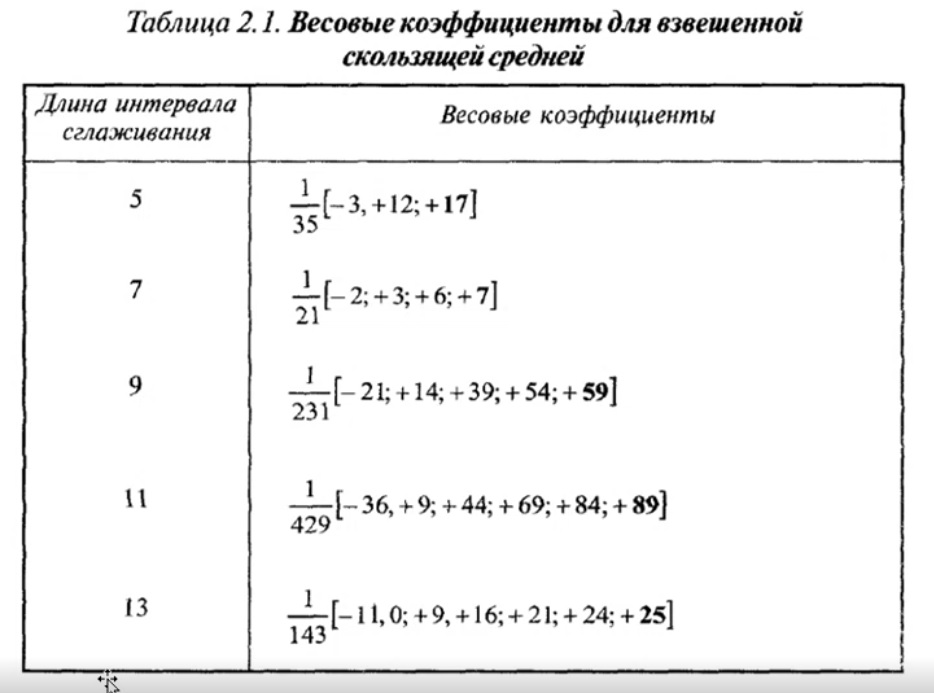

In [ ]:
weights=np.array([-3/35,12/35,17/35,12/35,-3/35])
weights

array([-0.08571429,  0.34285714,  0.48571429,  0.34285714, -0.08571429])

**16.	Воспользуйтесь приемом, описанным в п. 12, для нахождения взвешенной скользящей средней. Результат запишите в переменную wma52. Выведите на экран первые 10 значений с помощью функции head(). Сравните их с предыдущим результатом. Прокомментируйте результат.**

In [ ]:
wma52=series.rolling(5).apply(lambda x: np.dot(x,weights), raw=True)
wma52.head(10)

Date
2004-03-10     NaN
2004-03-11     NaN
2004-03-12     NaN
2004-03-13     NaN
2004-03-14    2.61
2004-03-15    2.59
2004-03-16    2.79
2004-03-17    2.93
2004-03-18    3.05
2004-03-19    2.72
Name: CO, dtype: float64

**17.	 Поместите на одну диаграмму линейный график исходных данных (series) и преобразованных на основе простой (sma5) и двух версий взвешенной скользящей средней для ширины окна 5 (wma51, wma52), воспользовавшись функцией figure(figsize = (12,6)), plot(data, label=label), а также функцией show() из модуля matplotlib.pyplot. Подпишите оси с помощью функций xlabel("Date") и ylabel("Price") из модуля matplotlib.pyplot. Создайте легенду с помощью функции legend() из модуля matplotlib.pyplot. Прокомментируйте результат.**

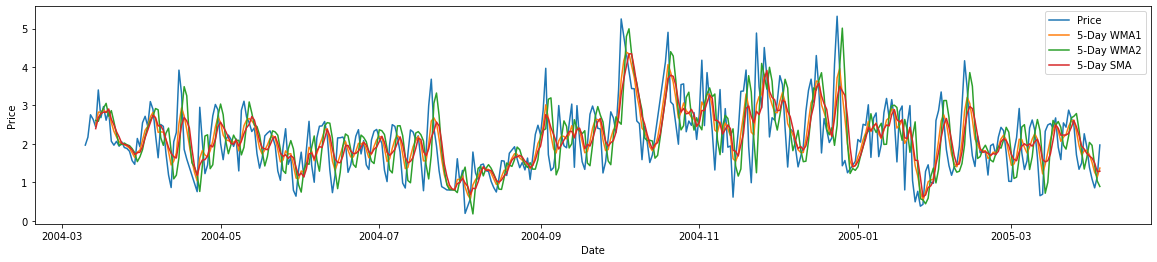

In [ ]:
plt.figure(figsize = (20,4))

plt.plot(series, label='Price')
plt.plot(wma51, label='5-Day WMA1')
plt.plot(wma52, label='5-Day WMA2') # зеленая более подходящая она с каким-то сдвигом более всего угадывает
plt.plot(sma5, label='5-Day SMA')   # зеленая более других угадывает амплтьуду, поэтому лучше она

plt.xlabel("Date")
plt.ylabel("Price")

plt.legend()
plt.show()

In [ ]:
X = series.values
weights=[-3/35,12/35,17/35,12/35,-3/35]*10
window = 5
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = np.sum([history[i]*weights[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

predicted=2.610893, expected=3.402083
predicted=2.487857, expected=2.681250
predicted=2.662143, expected=2.970833
predicted=2.766369, expected=2.614583
predicted=2.757798, expected=2.866667
predicted=2.721369, expected=2.068750
predicted=2.835655, expected=1.964583
predicted=2.589940, expected=2.064583
predicted=2.149762, expected=1.937500
predicted=1.917619, expected=2.052083
predicted=1.987440, expected=1.904167
predicted=2.001548, expected=1.879167
predicted=1.972262, expected=1.806250
predicted=1.846786, expected=1.562500
predicted=1.718214, expected=1.466667
predicted=1.768393, expected=2.139583
predicted=1.748214, expected=1.925000
predicted=1.763929, expected=2.550000
predicted=2.125179, expected=2.716667
predicted=2.520893, expected=2.458333
predicted=2.435893, expected=3.100000
predicted=2.353571, expected=2.900000
predicted=2.687857, expected=2.233333
predicted=2.534048, expected=1.637500
predicted=2.164048, expected=2.504167
predicted=2.160119, expected=2.454167
predicted=2.

IndexError: ignored